In [6]:
cd AS_Tiger/edgeR_Tiger

/home/kamanch2/AS_Tiger/edgeR_Tiger


In [1]:
# Load the packages needed for compositional analysis
import scanpy as sc
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

2023-11-28 15:30:37.422314: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-28 15:30:37.457951: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 15:30:38.412104: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
# Load h5ad file
adata = sc.read("vandy_AS_full_processed.forDE.h5ad")

In [8]:
adata

AnnData object with n_obs × n_vars = 114288 × 36588
    obs: 'doublet_scores', 'predicted_doublets', 'barcode', 'exon_ratio', 'fail_exonratio', 'batches', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Condition', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'seurat_cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_umap'

In [9]:
# Explore Anndata
print(adata.obs)

                                                    doublet_scores  \
CAAGTTATCCGTTATT-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...        0.134969   
TTATGCGCATATTGAC-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...        0.125364   
GTTTCAGCAGGAATCG-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...        0.141949   
GGTCTTGAGTCGCTAG-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...        0.145631   
AAGGATCCACCTACGG-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...        0.128458   
...                                                            ...   
TTTAGCAAGTGAGCGG-1-1                                      0.035514   
GTCGAAGCACATAACT-1-1                                      0.051939   
TGGATTCAGCTAATCA-1-1                                      0.075288   
GGGCAATAGGCCAATT-1-1                                      0.013346   
GGGTGAAGTTTATCTG-1-1                                      0.073298   

                                                    predicted_doublets  \
CAAGTTATCCGTTATT-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...                   0   
TTATGCGCATA

In [10]:
B=["X11_001", "X11_002", "X12_003", "X12_007", "X12_008", "X12_010", "X14_012", "X16_013", "X16_014", "AS1", "AS10", "AS11", "AS2", "AS3", "AS4", "AS5", "AS6", "AS7", "AS8", "AS9"]
cov_df = pd.DataFrame({"Cond":["Control", "Control", "Control", "Control", "Control", "Control", "Control", "Control", "Control", "AS", "AS", "AS", "AS", "AS", "AS", "AS", "AS", "AS", "AS", "AS"]}, index=B)

In [11]:
# Import data from scanpy
data_scanpy = dat.from_scanpy(
adata,
cell_type_identifier = "seurat_cell_type",
sample_identifier = "orig.ident",
covariate_df = cov_df
)
print(data_scanpy)

AnnData object with n_obs × n_vars = 20 × 7
    obs: 'Cond'
    var: 'n_cells'


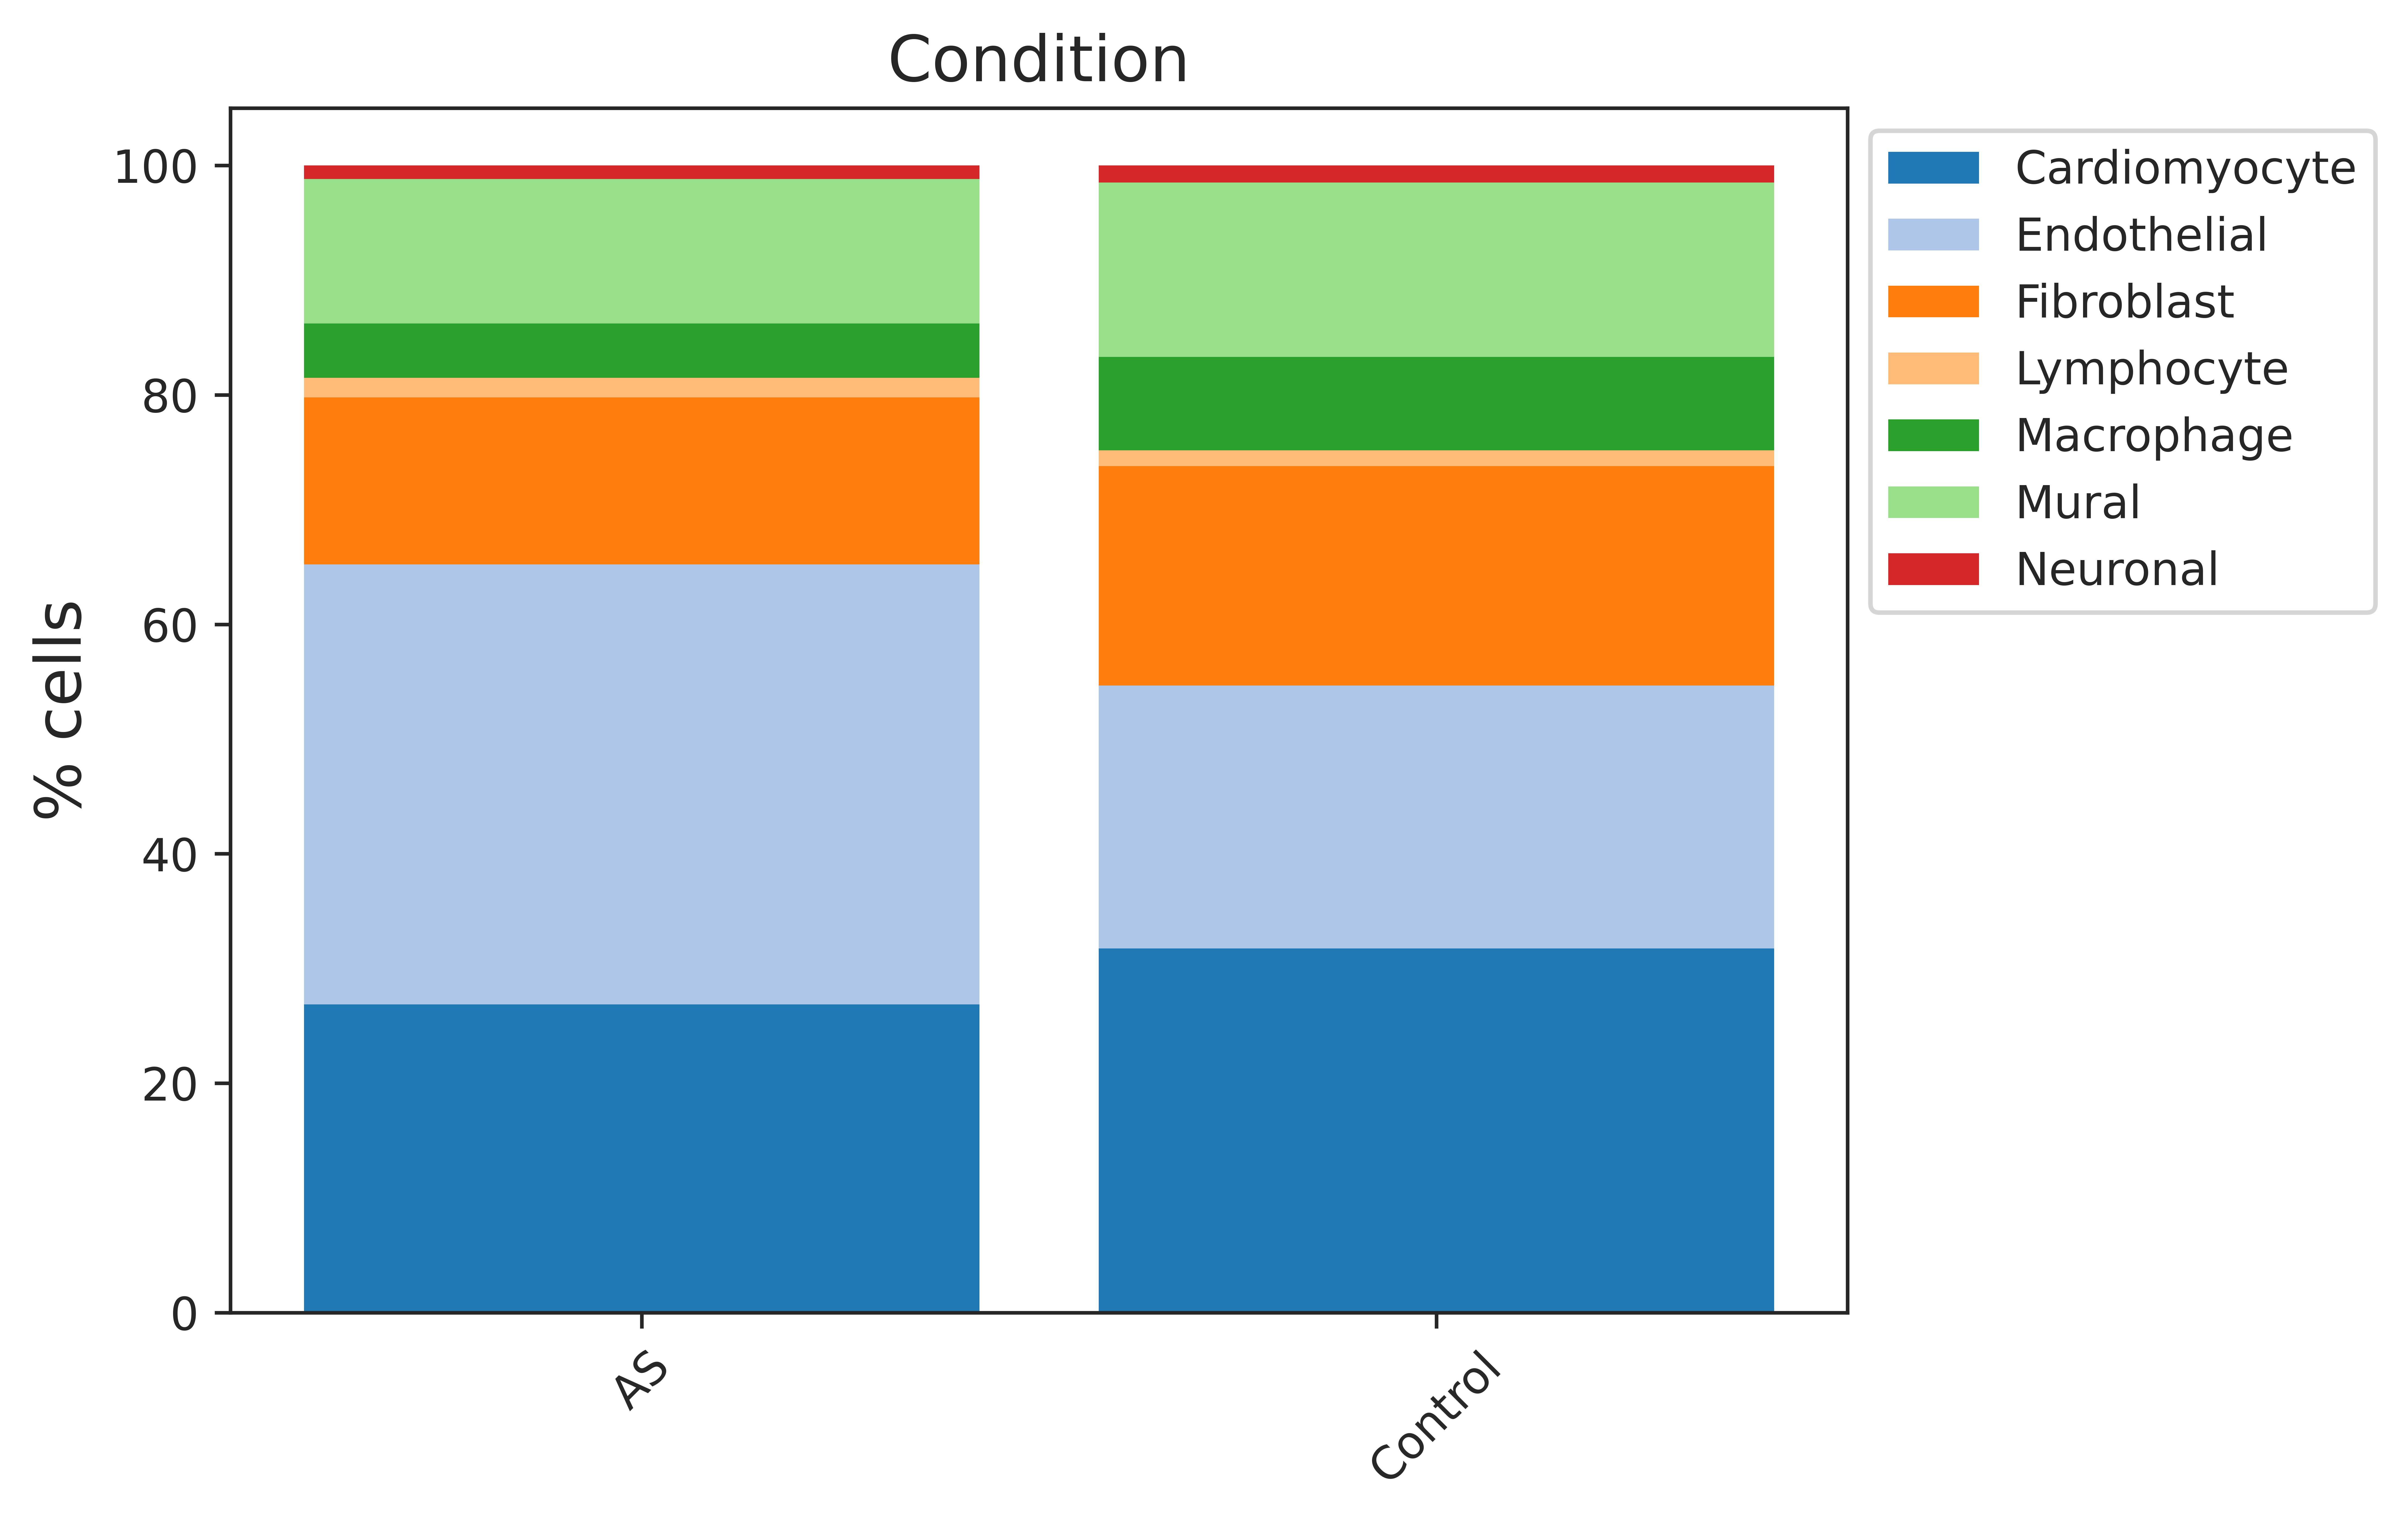

In [27]:
viz.stacked_barplot(data_scanpy, feature_name = "Cond", dpi=1200)
plt.ylabel('% cells', fontsize=14)
plt.title("Condition", fontsize=14)

plt.savefig('Figures/scCODA_condition.png', dpi = 1200, bbox_inches='tight')

In [28]:
viz.stacked_barplot(data_scanpy, feature_name = "samples", dpi=1200)
plt.ylabel('% cells', fontsize=14)
plt.title("Samples", fontsize=14)

plt.savefig('Figures/scCODA_samples.png', dpi = 1200, bbox_inches='tight')

In [13]:
model_all = mod.CompositionalAnalysis(data_scanpy, formula="C(Cond, Treatment('Control'))", reference_cell_type="automatic")
all_results = model_all.sample_hmc()
all_results.summary()

Automatic reference selection! Reference cell type set to Neuronal


  0%|                                                                                         | 0/20000 [00:00<?, ?it/s]2023-11-28 15:42:55.611980: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb250167de0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-11-28 15:42:55.612052: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-11-28 15:42:55.701674: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-28 15:42:56.264323: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:37<00:00, 527.38it/s]


MCMC sampling finished. (48.920 sec)
Acceptance rate: 55.0%
Compositional Analysis summary:

Data: 20 samples, 7 cell types
Reference index: 6
Formula: C(Cond, Treatment('Control'))

Intercepts:
               Final Parameter  Expected Sample
Cell Type                                      
Cardiomyocyte            3.492      1825.263473
Endothelial              3.182      1338.733939
Fibroblast               2.952      1063.669099
Lymphocyte               0.588       100.030949
Macrophage               1.977       401.207851
Mural                    2.766       883.136367
Neuronal                 0.611       102.358323


Effects:
                                                   Final Parameter  \
Covariate                           Cell Type                        
C(Cond, Treatment('Control'))[T.AS] Cardiomyocyte         0.000000   
                                    Endothelial           0.673483   
                                    Fibroblast            0.000000   
            

In [14]:
print(all_results.credible_effects())

Covariate                            Cell Type    
C(Cond, Treatment('Control'))[T.AS]  Cardiomyocyte    False
                                     Endothelial       True
                                     Fibroblast       False
                                     Lymphocyte       False
                                     Macrophage       False
                                     Mural            False
                                     Neuronal         False
Name: Final Parameter, dtype: bool
